In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.14.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

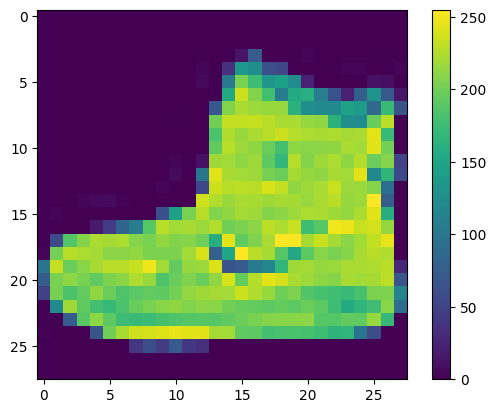

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

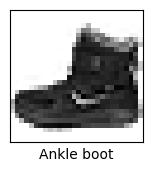

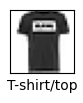

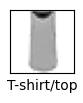

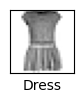

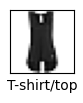

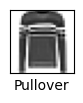

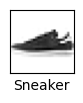

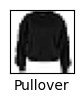

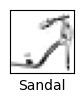

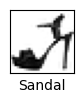

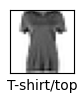

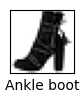

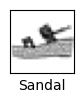

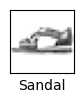

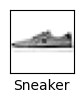

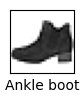

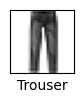

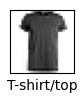

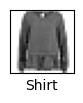

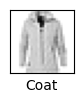

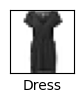

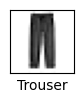

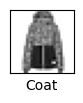

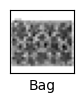

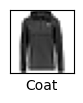

In [14]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [15]:
model = tf.keras.Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu', padding="same"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 127s 67ms/step - loss: 0.4168 - accuracy: 0.8473
Epoch 2/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.2769 - accuracy: 0.8986
Epoch 3/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.2290 - accuracy: 0.9143
Epoch 4/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.1962 - accuracy: 0.9267
Epoch 5/10
1875/1875 [==============================] - 138s 73ms/step - loss: 0.1677 - accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.1464 - accuracy: 0.9438
Epoch 7/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.1299 - accuracy: 0.9509
Epoch 8/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1091 - accuracy: 0.9583
Epoch 9/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0956 - accuracy: 0.9635
Epoch 10/10
1875/1875 [==============================] 

In [18]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.3119 - accuracy: 0.9154


[0.3118836581707001, 0.9154000282287598]

In [19]:
probability_model = tf.keras.Sequential([model,
tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 6s 18ms/step


In [21]:
predictions[0]

array([0.08533678, 0.08533678, 0.08533678, 0.08533678, 0.08533678,
       0.08533678, 0.08533678, 0.08533704, 0.08533678, 0.23196875],
      dtype=float32)

In [23]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')




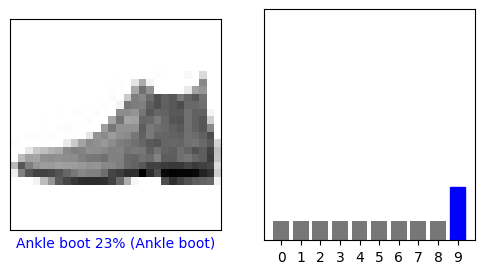

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()
